In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [40]:
DATADIR = 'C:/Users/otman/images_classification/code_SVM/personalities'
CATEGORIES = ['jobs','zuckerberg']
IMG_SIZE=50

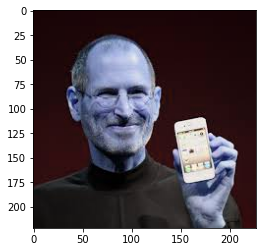

In [38]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break


In [39]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        label=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,label])
            except Exception as e:
                pass
create_training_data()            

In [43]:
print(len(training_data))


31


In [16]:
lenofimage = len(training_data)

In [48]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)


array([[ 25,   4,   6, ...,  52,  12,  14],
       [ 26,   5,   7, ...,  50,  46,  45],
       [ 74,  55,  20, ...,  22,  22,   3],
       ...,
       [ 66,  52, 164, ..., 184, 192, 198],
       [129, 127, 123, ...,  19,  19,  19],
       [177,  80,  54, ..., 155,  68,  50]], dtype=uint8)

In [18]:
X.shape

(31, 7500)

In [11]:
y=np.array(y)

In [12]:
y.shape

(31,)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)



**fitting our data in SVM model**

In [14]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**predicting the X_test**

In [53]:
prediction = svc.predict(X_test)

accury = svc.score(X_test,y_test)
print('accuracy:',accury )
print('Prediction:',prediction)

accuracy: 0.625
Prediction: [1 1 0 1 1 1 0 0]


In [55]:

print('prediction:',CATEGORIES[prediction[1]])
print('prediction:',CATEGORIES[prediction[2]])

prediction: zuckerberg
prediction: jobs


**fromulating the Classification report**

In [56]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [57]:
result


original  predicted
0         0          1
1         1          1
2         0          0
3         0          1
4         1          1
5         1          1
6         0          0
7         1          0